# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [143]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [36]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

593

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [90]:
#City Url
city_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric&q="

#Setting up lists to hold response info and count variables
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
except_count = 0
record_count = 0

#Loop to retrieve data, for every city change request url and get all data
#Added try/except when city not found
print("Beginning Data Retrieval")
print("------------------------------")
for city in cities:    
    
    record_count += 1
    city_query = city_url+city
    response_json = requests.get(city_query).json()
    
    try:
        print(f"Processing record {record_count} of set 1. | {city}")
        lat.append(response_json["coord"]["lat"])
        lng.append(response_json["coord"]["lon"])
        max_temp.append(response_json["main"]["temp_max"])
        humidity.append(response_json["main"]["humidity"])
        cloudiness.append(response_json["clouds"]["all"])
        wind_speed.append(response_json["wind"]["speed"])
        country.append(response_json["sys"]["country"])
        date.append(response_json["dt"])
    except:
        print("City not found. Skipping...")
        except_count += 1
        lat.append("na")
        lng.append("na")
        max_temp.append("na")
        humidity.append("na")
        cloudiness.append("na")
        wind_speed.append("na")
        country.append("na")
        date.append("na")
        pass

#Creating a dictionary with retrieved data and converting to DF
weather_dict = {
    "City": cities,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date,
}
weather_data = pd.DataFrame(weather_dict)

#Manually adding time of retrieved data
weather_time = datetime.now().strftime('%m/%d/%y')

Beginning Data Retrieval
------------------------------
Processing record 1 of set 1. | albany
Processing record 2 of set 1. | taolanaro
City not found. Skipping...
Processing record 3 of set 1. | busselton
Processing record 4 of set 1. | avarua
Processing record 5 of set 1. | mehamn
Processing record 6 of set 1. | bluff
Processing record 7 of set 1. | mahebourg
Processing record 8 of set 1. | machado
Processing record 9 of set 1. | wewak
Processing record 10 of set 1. | srisailam
Processing record 11 of set 1. | titisee-neustadt
Processing record 12 of set 1. | griffin
Processing record 13 of set 1. | ushuaia
Processing record 14 of set 1. | tiksi
Processing record 15 of set 1. | new norfolk
Processing record 16 of set 1. | kununurra
Processing record 17 of set 1. | barawe
City not found. Skipping...
Processing record 18 of set 1. | mar del plata
Processing record 19 of set 1. | gwadar
Processing record 20 of set 1. | tuktoyaktuk
Processing record 21 of set 1. | faanui
Processing reco

Processing record 183 of set 1. | kruisfontein
Processing record 184 of set 1. | vaitupu
City not found. Skipping...
Processing record 185 of set 1. | san quintin
Processing record 186 of set 1. | sinnamary
Processing record 187 of set 1. | kulmbach
Processing record 188 of set 1. | grand gaube
Processing record 189 of set 1. | shache
Processing record 190 of set 1. | saleaula
City not found. Skipping...
Processing record 191 of set 1. | grand river south east
City not found. Skipping...
Processing record 192 of set 1. | yanchukan
City not found. Skipping...
Processing record 193 of set 1. | vysokogornyy
Processing record 194 of set 1. | pahrump
Processing record 195 of set 1. | istra
Processing record 196 of set 1. | dauriya
Processing record 197 of set 1. | fort-shevchenko
Processing record 198 of set 1. | leningradskiy
Processing record 199 of set 1. | gold coast
Processing record 200 of set 1. | lavrentiya
Processing record 201 of set 1. | pitsunda
Processing record 202 of set 1. |

Processing record 365 of set 1. | port blair
Processing record 366 of set 1. | hay river
Processing record 367 of set 1. | la roda
Processing record 368 of set 1. | itarema
Processing record 369 of set 1. | talcahuano
Processing record 370 of set 1. | iquitos
Processing record 371 of set 1. | taburi
City not found. Skipping...
Processing record 372 of set 1. | wana
Processing record 373 of set 1. | cavalcante
Processing record 374 of set 1. | karlskrona
Processing record 375 of set 1. | pangnirtung
Processing record 376 of set 1. | georgiyevka
Processing record 377 of set 1. | muros
Processing record 378 of set 1. | sri aman
Processing record 379 of set 1. | nucsoara
Processing record 380 of set 1. | honiara
Processing record 381 of set 1. | lagoa
Processing record 382 of set 1. | lubao
Processing record 383 of set 1. | moranbah
Processing record 384 of set 1. | la mata
Processing record 385 of set 1. | general pico
Processing record 386 of set 1. | caxito
Processing record 387 of set 

Processing record 544 of set 1. | talas
Processing record 545 of set 1. | dovers
Processing record 546 of set 1. | victor harbor
Processing record 547 of set 1. | yermakovskoye
Processing record 548 of set 1. | diamantino
Processing record 549 of set 1. | tunxi
City not found. Skipping...
Processing record 550 of set 1. | srivardhan
Processing record 551 of set 1. | loknya
Processing record 552 of set 1. | solovetskiy
City not found. Skipping...
Processing record 553 of set 1. | soubre
Processing record 554 of set 1. | nisia floresta
Processing record 555 of set 1. | namatanai
Processing record 556 of set 1. | labutta
City not found. Skipping...
Processing record 557 of set 1. | kloulklubed
Processing record 558 of set 1. | sept-iles
Processing record 559 of set 1. | buchanan
Processing record 560 of set 1. | bontang
Processing record 561 of set 1. | kawalu
Processing record 562 of set 1. | san cosme y damian
Processing record 563 of set 1. | miri
Processing record 564 of set 1. | sorl

In [148]:
#Removing cities not found from DF
clean_weather_data = weather_data.loc[weather_data["Date"]!="na"]
len(clean_weather_data)

540

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | yerbogachen
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | touba
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | rio grande
Processing Record 7 of Set 1 | ibra
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | tuktoyaktuk
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | nemuro
Processing Record 12 of Set 1 | morgan city
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | kawalu
Processing Record 15 of Set 1 | hami
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | katsuura
Processing Record 18 of Set 1 | hjallerup
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | bengkulu
Processing Record 21 of Set 1 | victoria
Processing Record 22 of Set 1 | rangapara
Processing Record 23 of Set 1 | hithadho

Processing Record 36 of Set 4 | chimbote
Processing Record 37 of Set 4 | kanor
Processing Record 38 of Set 4 | san pedro de uraba
Processing Record 39 of Set 4 | taphan hin
Processing Record 40 of Set 4 | upernavik
Processing Record 41 of Set 4 | matagami
Processing Record 42 of Set 4 | terme
Processing Record 43 of Set 4 | coria
Processing Record 44 of Set 4 | pallasovka
Processing Record 45 of Set 4 | asyut
Processing Record 46 of Set 4 | cockburn town
Processing Record 47 of Set 4 | osypenko
Processing Record 48 of Set 4 | sioux lookout
Processing Record 49 of Set 4 | gotsu
Processing Record 0 of Set 5 | abadan
Processing Record 1 of Set 5 | lewistown
Processing Record 2 of Set 5 | toftir
City not found. Skipping...
Processing Record 3 of Set 5 | fortuna
Processing Record 4 of Set 5 | ostersund
Processing Record 5 of Set 5 | calafell
Processing Record 6 of Set 5 | panguna
Processing Record 7 of Set 5 | nantucket
Processing Record 8 of Set 5 | la ronge
Processing Record 9 of Set 5 | 

City not found. Skipping...
Processing Record 28 of Set 8 | porto walter
Processing Record 29 of Set 8 | horsham
Processing Record 30 of Set 8 | maraa
Processing Record 31 of Set 8 | vila franca do campo
Processing Record 32 of Set 8 | garoua
Processing Record 33 of Set 8 | kampot
Processing Record 34 of Set 8 | marawi
Processing Record 35 of Set 8 | egvekinot
Processing Record 36 of Set 8 | liverpool
Processing Record 37 of Set 8 | sanandaj
Processing Record 38 of Set 8 | tabou
Processing Record 39 of Set 8 | kavieng
Processing Record 40 of Set 8 | cap malheureux
Processing Record 41 of Set 8 | logan
Processing Record 42 of Set 8 | klaksvik
Processing Record 43 of Set 8 | sisimiut
Processing Record 44 of Set 8 | whyalla
Processing Record 45 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 46 of Set 8 | hailar
Processing Record 47 of Set 8 | ajdabiya
Processing Record 48 of Set 8 | saint-georges
Processing Record 49 of Set 8 | hoopstad
Processing Record 0 of Set 9 

Processing Record 19 of Set 12 | barra dos coqueiros
Processing Record 20 of Set 12 | provideniya
Processing Record 21 of Set 12 | norman wells
Processing Record 22 of Set 12 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 23 of Set 12 | follonica
Processing Record 24 of Set 12 | verkhoyansk
Processing Record 25 of Set 12 | henties bay
Processing Record 26 of Set 12 | kudahuvadhoo
Processing Record 27 of Set 12 | bandundu
Processing Record 28 of Set 12 | cascais
Processing Record 29 of Set 12 | dickinson
Processing Record 30 of Set 12 | san benito
Processing Record 31 of Set 12 | kenai
Processing Record 32 of Set 12 | rio pardo de minas
Processing Record 33 of Set 12 | erzin
Processing Record 34 of Set 12 | san carlos del zulia
Processing Record 35 of Set 12 | kyshtovka
Processing Record 36 of Set 12 | zima
Processing Record 37 of Set 12 | khandbari
Processing Record 38 of Set 12 | salyan
Processing Record 39 of Set 12 | saint-joseph
Processing Record 40 of Set 12 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [113]:
#Removing cities not found from DF
clean_weather_data = weather_data.loc[weather_data["Date"]!="na"]

#Exporting to csv file
clean_weather_data.to_csv("city_weather_data.csv", encoding="utf-8", index=False)

#Importing csv to new df to double check info and change format of columns, previously objects
csv_weather_data = pd.read_csv("city_weather_data.csv")
csv_weather_data

City      Lat       Lng  Max Temp  Humidity  Cloudiness  Wind Speed  \
0       albany  42.6001  -73.9662     17.78        19          97        0.89   
1    busselton -33.6500  115.3333     12.78        96           0        1.43   
2       avarua -21.2078 -159.7750     25.00        94          97        2.06   
3       mehamn  71.0357   27.8492     -2.00        86          90        5.14   
4        bluff -46.6000  168.3333      5.56        83         100        2.24   
..         ...      ...       ...       ...       ...         ...         ...   
535      vicar  36.8316   -2.6427     20.00        68          20        9.26   
536  geraldton -28.7667  114.6000     14.00        82          32        2.06   
537      korla  41.7597   86.1469     15.94        31          69        0.95   
538      bilma  18.6853   12.9164     33.79         9           0        3.08   
539   tateyama  34.9833  139.8667     14.00        72          20        3.09   

    Country        Date  
0        US  1619548826  
1        AU  1619549046  
2        CK  1619549046  
3        NO  1619549046  
4        NZ  1619548926  
..      ...         ...  
535      ES  1619548794  
536      AU  1619548732  
537      CN  1619548750  
538      NE  1619548794  
539      JP  1619548795  

[540 rows x 9 columns]

In [114]:
csv_weather_data.describe()

Lat         Lng    Max Temp    Humidity  Cloudiness  Wind Speed  \
count  540.000000  540.000000  540.000000  540.000000  540.000000  540.000000   
mean    20.354056   22.129847   16.343648   69.622222   52.994444    3.345407   
std     33.347474   88.926576   11.637940   22.769187   39.239406    2.207779   
min    -54.800000 -175.200000  -19.540000    7.000000    0.000000    0.270000   
25%     -6.908575  -56.400500    8.000000   57.000000   15.750000    1.620000   
50%     22.580800   25.333650   18.015000   75.000000   59.000000    2.850000   
75%     48.468175  101.087950   26.000000   87.000000   92.000000    4.582500   
max     78.218600  179.316700   38.800000  100.000000  100.000000   11.830000   

               Date  
count  5.400000e+02  
mean   1.619549e+09  
std    1.514279e+02  
min    1.619548e+09  
25%    1.619549e+09  
50%    1.619549e+09  
75%    1.619549e+09  
max    1.619549e+09

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [119]:
#I had no cities over 100% humidity but used to double check
clean_city_data = csv_weather_data.loc[csv_weather_data["Humidity"]<=100]
clean_city_data

City      Lat       Lng  Max Temp  Humidity  Cloudiness  Wind Speed  \
0       albany  42.6001  -73.9662     17.78        19          97        0.89   
1    busselton -33.6500  115.3333     12.78        96           0        1.43   
2       avarua -21.2078 -159.7750     25.00        94          97        2.06   
3       mehamn  71.0357   27.8492     -2.00        86          90        5.14   
4        bluff -46.6000  168.3333      5.56        83         100        2.24   
..         ...      ...       ...       ...       ...         ...         ...   
535      vicar  36.8316   -2.6427     20.00        68          20        9.26   
536  geraldton -28.7667  114.6000     14.00        82          32        2.06   
537      korla  41.7597   86.1469     15.94        31          69        0.95   
538      bilma  18.6853   12.9164     33.79         9           0        3.08   
539   tateyama  34.9833  139.8667     14.00        72          20        3.09   

    Country        Date  
0        US  1619548826  
1        AU  1619549046  
2        CK  1619549046  
3        NO  1619549046  
4        NZ  1619548926  
..      ...         ...  
535      ES  1619548794  
536      AU  1619548732  
537      CN  1619548750  
538      NE  1619548794  
539      JP  1619548795  

[540 rows x 9 columns]

In [118]:
#  Get the indices of cities that have humidity over 100%.
# Skipping there are no cases

In [120]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

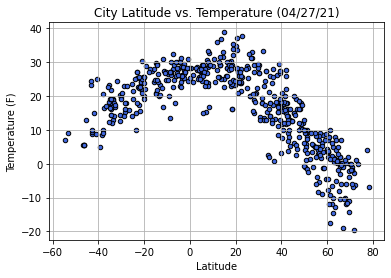

This scatter plot is showing the Temperature of each city by the Latitude. As we can observe, the maximum temperatures are highest as the latitude approaches 0-20.


In [159]:
#Generating plot, with title and labels. Adding explanation after plot. 
clean_city_data.plot(kind='scatter',x='Lat',y='Max Temp', color="royalblue", edgecolors="black")
plt.title(f"City Latitude vs. Temperature ({weather_time})")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.show()
print("This scatter plot is showing the Temperature of each city by the Latitude. As we can observe, the maximum temperatures are highest as the latitude approaches 0-20.")

## Latitude vs. Humidity Plot

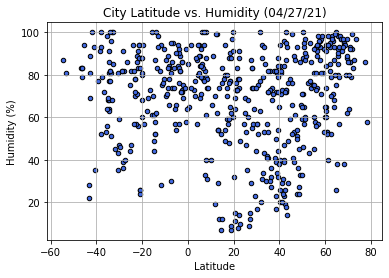

In [154]:
#Generating plot, with title and labels. Adding explanation after plot. 
clean_city_data.plot(kind='scatter',x='Lat',y='Humidity', color="royalblue", edgecolors="black")
plt.title(f"City Latitude vs. Humidity ({weather_time})")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()
print("This scatter plot is showing the Humidity of each city by the Latitude. We can say that all points are generally scattered randomly which means we expect to have no relationship.")

## Latitude vs. Cloudiness Plot

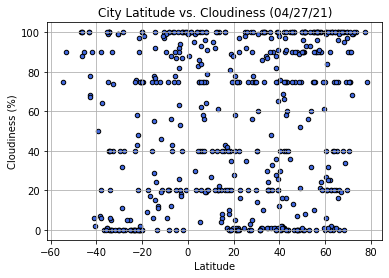

In [155]:
#Generating plot, with title and labels. Adding explanation after plot. 
clean_city_data.plot(kind='scatter',x='Lat',y='Cloudiness', color="royalblue", edgecolors="black")
plt.title(f"City Latitude vs. Cloudiness ({weather_time})")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()
print("This scatter plot is showing the Cloudiness of each city by the Latitude. We can say that all points are generally scattered randomly which means we expect to have no relationship.")

## Latitude vs. Wind Speed Plot

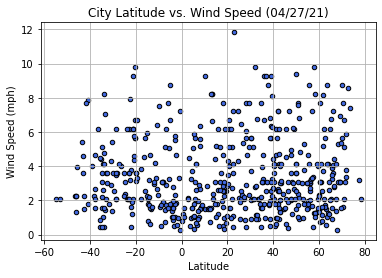

This


In [157]:
#Generating plot, with title and labels. Adding explanation after plot. 
clean_city_data.plot(kind='scatter',x='Lat',y='Wind Speed', color="royalblue", edgecolors="black")
plt.title(f"City Latitude vs. Wind Speed ({weather_time})")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()
print("This scatter plot is showing the Wind Speed of each city by the Latitude. We can say that all points are generally scattered randomly which means we expect to have no relationship.")

## Linear Regression

In [164]:
#Separate DF into Northern and Southern Hemispheres
northern_weather_data = clean_city_data.loc[clean_city_data["Lat"]>=0]
southern_weather_data = clean_city_data.loc[clean_city_data["Lat"]<0]

True

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

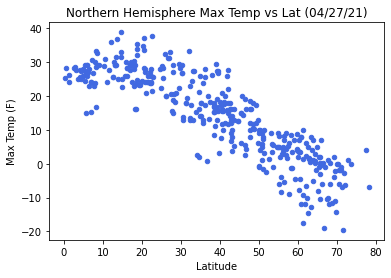

In [166]:
northern_weather_data.plot(kind='scatter',x='Lat',y='Max Temp', color="royalblue")
plt.title(f"Northern Hemisphere Max Temp vs Lat ({weather_time})")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


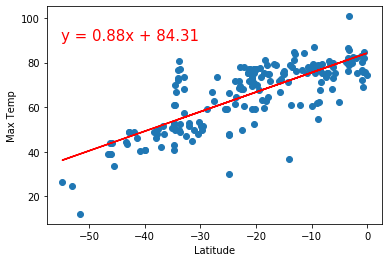

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


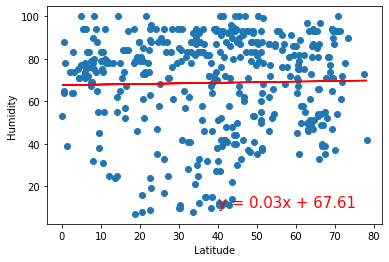

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


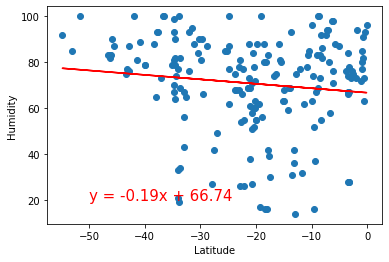

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


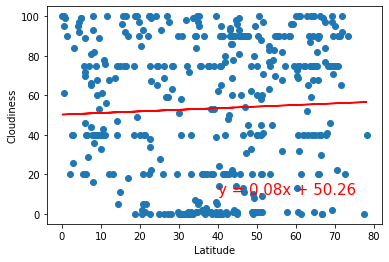

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


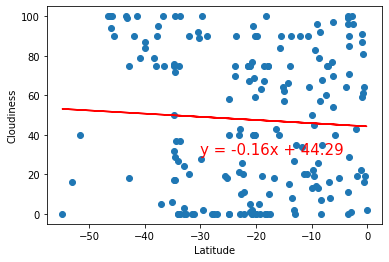

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


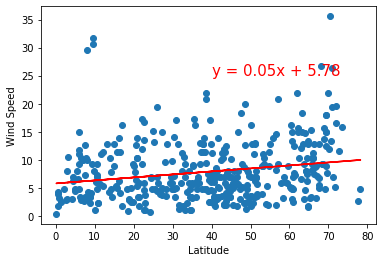

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


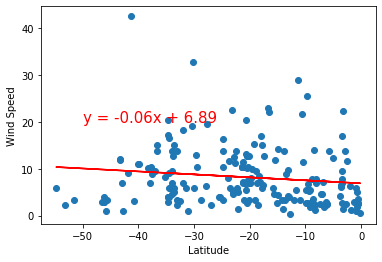